# ***LABORATORIO VIRTUAL DYN: RESISTENCIA DEL AIRE***

---

**Importante**: *Al subir esta tarea a gradescope asegúrese de que el archivo tenga el nombre correcto y de incluir a todos los miembros de su grupo.*

# Marco Teórico
Cuando se analizan los movimientos bajo la influencia de la gravedad, en muchas situaciones es importante ponderar las implicaciones de la resistencia del aire.

Este, al ser un fluido, presenta resistencia al paso de un objeto a través del mismo. Cuando se modela esta resistencia, se suele hacer de dos formas:

- Fuerza cuyo módulo es proporcional al cuadrado de la rapidez y dirección opuesta a la velocidad: $ \mathbf{F} = - a v \mathbf{v} $.
- Fuerza cuyo módulo es proporcional a la rapidez y dirección opuesta a la velocidad: $ \mathbf{F} = - b \mathbf{v} $.

Las constantes $a$ y $b$ son llamadas *coeficientes de arrastre* y depende de diversos factores, como la densidad del aire, la sección transversal del objeto, entre otros.

En este laboratorio se estudiarán los efectos que conlleva la consideración de la resistencia del aire en el análisis de un movimiento bajo la influencia de la gravedad.

# Desarrollo

In [32]:
## Declare aquí las librerías necesarias

import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt

## *Set-up*

En el sistema de coordenadas usual, considere una partícula de masa $ m = 5 \,\mathrm{kg} $ que se mueve bajo la influencia de la gravedad y de la resistencia del aire. En el archivo `data.txt` se han guardado cinco columnas indicando, en orden, el tiempo, la componente $X$ de la posición, la componente $X$ de la velocidad, la componente $Y$ de la posición y la componente $Y$ de la velocidad en el movimiento mencionado.

### Pregunta 1
Complete los espacios marcados con un guión y complete el código a usar para cargar la data del archivo y guardar las cantidades físicas en las variables correspondientes:

- `T`: tiempo
- `X`: posición $x$
- `VX`: velocidad $v_x$
- `Y`: posición $y$
- `VY`: velocidad $v_y$

In [33]:
# Sugerencia: la rutina np.loadtxt necesita como input el nombre del archivo. Recuerde que python empieza a enumerar desde 0 y no desde 1.

dataset = np.loadtxt("./data.txt").T

T,X,VX,Y,VY = dataset

### Pregunta 2
Para entender mejor la información brindaba en el *dataset*, grafique $t$ vs $x$, $t$ vs $y$ y $x$ vs $y$.

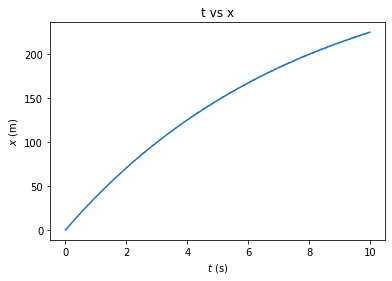

In [34]:
# Grafica t vs x. Como ayuda, solo debe completar esta celda para hacer la gráfica pedida

plt.plot(T, X)
plt.title('t vs x')
plt.xlabel('$t$ (s)')
plt.ylabel('$x$ (m)')
plt.show()

¿Es una línea recta? ¿Esperaría que fuese una línea recta? Argumente.

*Haga doble click aquí para que escriba su respuesta. Para las fórmulas matemáticas puede usar la sintaxis de LaTeX o texto plano.*

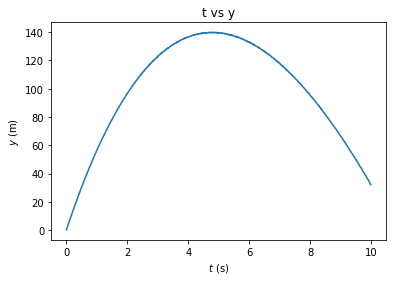

In [35]:
## Grafica t vs y.

plt.plot(T, Y)
plt.title('t vs y')
plt.xlabel('$t$ (s)')
plt.ylabel('$y$ (m)')
plt.show()

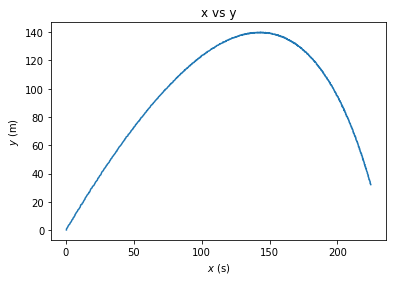

In [36]:
## Grafica x vs y.

plt.plot(X, Y)
plt.title('x vs y')
plt.xlabel('$x$ (s)')
plt.ylabel('$y$ (m)')
plt.show()

¿Por qué las dos últimas gráficas se parecen?

*Haga doble click aquí para que escriba su respuesta. Para las fórmulas matemáticas puede usar la sintaxis de LaTeX o texto plano.*

## Movimiento sin resistencia del aire

### Pregunta 3
Obtenga las componentes de la posición y velocidad iniciales de la partícula y guardelas en las variables señaladas.

In [37]:
## Recuerde que python empieza a enumerar desde el cero.

# Componente X de la posicion inicial
x0 = 
# Componente Y de la posicion inicial
y0 =

# Componente X de la velocidad inicial
v0x =
# Componente Y de la velocidad inicial
v0y =

print("La posición inicial es: r_0 = {0}i + {1}j m".format(x0, y0))
print("La velocidad inicial es: v_0 = {0}i + {1}j m/s".format(v0x, v0y))

SyntaxError: invalid syntax (3777569321.py, line 4)

### Pregunta 4
Podemos comparar este movimiento en análisis con uno con las misma condiciones iniciales pero donde no actúe el aire. Complete el siguiente código para realizar la gráfica de un movimiento parabólico con las mismas condiciones iniciales. Recuerde las siguientes fórmulas para el movimiento parabólico

$$ \begin{align*}
x(t) & = x_0 + v_{0x} t \\
y(t) & = y_0 + v_{0y} t - \frac{1}{2} g t^2 
\end{align*}
$$

In [38]:
## Observación: De las array obtenidas anteriormente solo una sera de utilidad para este caso.

# Valor de la aceleracion de la gravedad, en m/s^2
g = 9.81

# En las siguientes array guarde las componentes X y Y del movimiento parabólico
Xparab = 
Yparab = 

SyntaxError: invalid syntax (2357842003.py, line 7)

Ejecute la siguiente celda para graficar tanto el movimiento parabólico como el proviente del *dataset*.

In [ ]:
# Realice las gráficas correspondientes en un solo canvas
plt.plot(X, Y, label=r'Dataset')
plt.plot(Xparab, Yparab, label=r'Parabólico')
plt.legend()
plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.show()

Compare y explique las similutdes y diferencias entre dicho movimiento con el caso donde sí hay resistencia del aire.

*Haga doble click aquí para que escriba su respuesta. Para las fórmulas matemáticas puede usar la sintaxis de LaTeX o texto plano.*

## Cálculo del coeficiente de arrastre

Consideraremos que la resistencia del aire es proporcional a la velocidad. El otro caso se verá más adelante. Sea la fuerza que representa la resistencia del aire

$$ \mathbf{F} = -b \mathbf{v} = - b v_x \mathbf{i} - b v_y \mathbf{j} $$

donde $b$ es el *coeficiente de arrastre*. Podemos calcular el trabajo de esta fuerza usando la definición 

$$ \begin{align*}
W_F & = \int_{\mathbf{r}_a}^{\mathbf{r}_b} \mathbf{F} \cdot d\mathbf{r} \\
& = \int_{\mathbf{r}_a}^{\mathbf{r}_b} (F_x dx + F_y dy) \\
& = \int_{t_a}^{t_b} (F_x v_x + F_y v_y) dt \\
& = \int_{t_a}^{t_b} -b (v_x^2 + v_y^2) dt \qquad \Rightarrow \qquad W_F = -b \int_{t_a}^{t_b} v^2 dt
\end{align*} $$

Si conociéramos los valores del trabajo de la fuerza y la integral, podríamos calcular el coeficiente de arrastre:

$$ b = - \frac{W_F}{\int_{t_a}^{t_b} v^2 dt} \equiv - \frac{W_F}{I} $$


### Pregunta 5
El trabajo mencionado se puede calcular usando el teorema del trabajo y la energía

$$ \begin{align*}
W_{\text{neto}} & = \Delta K \\
W_{\text{peso}} + W_F & = K_f - K_0 \qquad \implies \qquad W_F = K_f - K_0 - W_{\text{peso}}
\end{align*} $$

Complete el código para realizar el cálculo del trabajo de la resistencia del aire usando el teorema del trabajo y la energía.

In [ ]:
# Masa de la partícula, en kg
m = 5.

# Trabajo del peso. Recuerde que puede acceder al último elemente de un array con el indice -1.
WP = 

# Energía cinética inicial
K0 = 

# Energía cinética final
Kf = 

# Teorema del trabajo y la energía
WF = 

print("El trabajo de la resistencia del aire es: W_F = {0} J".format(WF))

### Pregunta 6

Complete el código para el cálculo de la integral $ I = \int_{t_a}^{t_b} v^2 dt $.

In [ ]:
## Sugerencia: Para integrar y(x) se suele usar la rutina sp.simps(y, x).

# Integrando
VS = 

# Integracion
I = 

print("El valor de la integral es: {0} m^2/s".format(I))

### Pregunta 7
Calcule el coeficiente de arrastre.

In [ ]:
b = 

print("El coeficiente de arrastre es: {0} kg/s".format(b))

## Simulación del movimiento

### Pregunta 8
Obtenido el coeficiente de arrastre, complete el código siguiente para resolver la segunda ley de Newton entendiéndola como ecuación diferencial.

In [ ]:
## Sugerencia: Las ecuaciones diferenciales se resuelven usando la rutina sp.odeint. Consulte la documentacion de scipy para mas informacion.

# Condiciones iniciales en orden: x, vx, y, vy. Debe ser un array.
X0 = [-, -, -, -]

# Resolviendo la segunda ley de Newton
def f(X, t):
    x, vx, y, vy = X
    # Debe retornar un array
    return [-, -, -, -]

sol = sp.odeint(f, X0, T)

# Guarde las variables necesarias
Xsim = sol[:, 0]
Ysim = sol[:, 2]

### Pregunta 9
Grafique la trayectoria obtenida en el problema anterior con la obtenida del *dataset* inicial.

In [ ]:
## Grafica x vs y.

plt.plot(-, -, label=r'Dataset')
plt.plot(-, -, label=r'Simulación')
plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.legend()
plt.show()

Comente y explique las similitudes y diferencias entre ambas trayectorias. ¿El resultado es el esperado?

*Haga doble click aquí para que escriba su respuesta. Para las fórmulas matemáticas puede usar la sintaxis de LaTeX o texto plano.*

### Pregunta 10

Las preguntas anteriores se resolvieron asumiendo que la resistencia del aire era proporcional a la velocidad del objeto. Mencione qué cambios deberían hacerse en los soluciones anteriores para una resistencia que es proporcional al cuadrado de la velocidad del objeto.

*Haga doble click aquí para que escriba su respuesta. Para las fórmulas matemáticas puede usar la sintaxis de LaTeX o texto plano.*